In [149]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [150]:
def g2(roots, x):
    val = 1
    for root in roots:
        val *= (x-root)
    return val


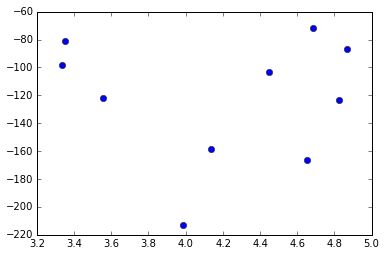

In [151]:
roots = (-2,1,-1,5,2)
N, x_max = 10, 5
x = np.random.rand(N)*x_max
noise_sigma = 50
noise =np.random.normal(0, noise_sigma, N)
y = [g2(roots,xx) for xx in x] + noise
points = (x,y)
plt.plot(x,y,'o')
plt.show()
x_original = x

In [152]:
points = (x,y)
print(points)
np.random.rand(5)

(array([ 3.55343557,  4.68593699,  4.13396939,  4.65424607,  4.44621257,
        3.33539351,  4.86589918,  3.3515072 ,  4.82334951,  3.98316422]), array([-121.90543426,  -71.41822736, -158.28830216, -166.614618  ,
       -103.42047826,  -98.59287883,  -86.49279262,  -81.2770629 ,
       -123.685673  , -213.02775683]))


0.127366031709
0.0862579969549
0.0427007103291
0.271540982065
0.728468787338


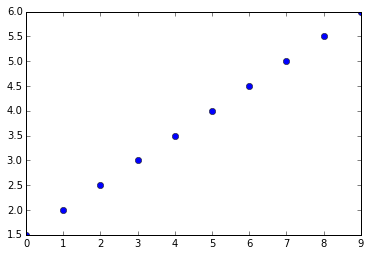

/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dragon/Library/Python/3.5/lib/python/site-packages/ipykernel/__main__.py:70: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/dragon/Library/Python/3.5/lib/python/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


max: 8 min: -8


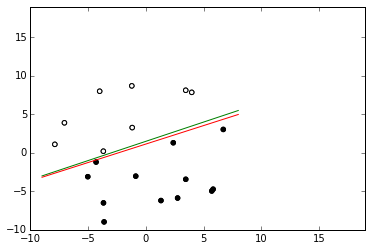

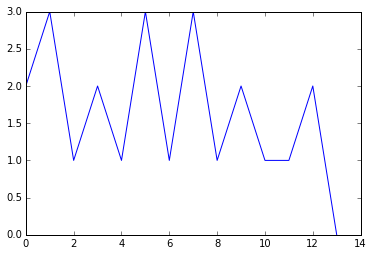

In [153]:
# ###  perceptron w/o stoppage

# the original line
a, b = np.matrix((1, -2)), 3.0
x = range(10)
# <a,pt> = b
# => a_0*x + a_1*y = b
# => y = (b - a_0*x) / a_1
y = (-b - x * a[0, 0])*1.0 / a[0, 1]
plt.plot(x, y, 'o')
plt.show()

# generate random points
val_min = min(min(x), min(y))
val_max = max(max(x), max(y))
val = max(abs(val_min), abs(val_max))
n_random = 20
data = np.random.rand(2, n_random) * (2 * val) - val
vals_pts = a * data + b
ixs_pos = np.where(vals_pts >= 0)[1]
ixs_neg = np.where(vals_pts < 0)[1]
in_pos, in_neg = ixs_pos.shape[0], ixs_neg.shape[0]
plt.scatter(data[0, ixs_pos], data[1, ixs_pos], c=['0'] * in_pos)
plt.scatter(data[0, ixs_neg], data[1, ixs_neg], c=['1'] * in_neg)


## init weight
# perceptron learning algo
offset = 10
# to speed up comparison
signs_pts = np.sign(vals_pts)
T = 2000
w = np.matrix((1, 1, -11))
max_p = int(np.max(data))
min_p = int(np.min(data))
print('max: {0} min: {1}'.format(max_p, min_p))
# add 1's as the first entry of each point
pts = np.vstack([np.ones(n_random), data])
in_discrepancies_all = []
in_disc_best, w_best = 1000.0, None
for t in range(T):
    # show w
    x = range(min_p-1, max_p+1)
    y = (-w[0,0] - x * w[0,1]) * 1.0 / w[0,2]
    #plt.plot(x, y, color = str(t*1.0/T))
    
    # find the vals
    vals_t = w * pts
    ixs_discrepancies = np.where(signs_pts != np.sign(vals_t))[1]
    in_discrepancies = ixs_discrepancies.shape[0]
    in_discrepancies_all.append(in_discrepancies)
    
    if (in_discrepancies < in_disc_best):
        in_disc_best, w_best = in_discrepancies, w
    # if there are no discrepencies, the get the fuck lost
    if (in_discrepancies == 0):
        break
    
    ix_pt = ixs_discrepancies[0]
    # update w
    w = w + signs_pts[0, ix_pt] * pts[:, ix_pt]

# plot the points
plt.scatter(data[0, ixs_pos], data[1, ixs_pos], c=['0'] * in_neg)
plt.scatter(data[0, ixs_neg], data[1, ixs_neg], c=['1'] * in_neg)
# plot the actual line
y_actual = (-b - x * a[0, 0]) * 1.0 / a[0, 1]
plt.plot(x, y_actual, color='g')
# plot the best line found by perceptron
y = (-w_best[0,0] - x * w_best[0,1]) * 1.0 / w_best[0,2]
plt.plot(x, y, color='r')

plt.axis((val_min-offset,val_max+offset,val_min-offset,val_max+offset))
plt.show()

plt.plot(range(len(in_discrepancies_all)), in_discrepancies_all)
plt.show()


centroid: 
[[ 0.68342176]
 [ 0.06969236]]
line equation: 
[[ 0.06969236]
 [-0.68342176]]
computed w: 
[[ 0.06969236]
 [-0.68342176]]


/Users/dragon/Library/Python/3.5/lib/python/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


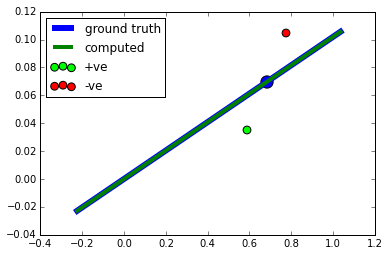

In [154]:
#### linear classification using regression - separable

from prettytable import PrettyTable

# basic functions
def lm_inner(a, b):
    return (a.transpose()*b)[0,0]

# generate random points
in_pts = 2
pts = np.matrix(np.random.rand(in_pts, 2))

# find a line passing thro this centroid of the points and the origin
# the y-intercept is zero, hence find the slope directly

# find and show centroid
centroid = pts.mean(0).transpose()

print('centroid: \n{0}'.format(centroid))
plt.scatter(centroid[0,0],centroid[1,0], c=[0,0,1] ,s=150)

# find line equation
# (y-0)/(y1-0) = (x-0)/(x1-0)
# => x1*y = y1*x
# => <[y1 -x1], [x,y]> = 0
a, b = np.matrix((centroid[1,0],-centroid[0,0])).reshape((2,1)), 0
print('line equation: \n{0}'.format(a))

# classify the points to find ground truth
## todo: find a better way to multiply
vals_gt = np.matrix([lm_inner(a, pts[ix,:].transpose()) for ix in range(in_pts)]).transpose()
ixs_pos = np.where(vals_gt >= 0)[0]
ixs_neg = np.where(vals_gt < 0)[0]
plt.scatter(pts[ixs_pos,0],pts[ixs_pos,1],marker='o',s=60, c=[[0,1,0]]*len(ixs_pos),label='+ve')
plt.scatter(pts[ixs_neg,0],pts[ixs_neg,1],marker='o',s=60, c=[[1,0,0]]*len(ixs_pos),label='-ve')

# show the ground truth line
pts_min, pts_max = np.max(pts), np.min(pts)
offset = 1
line_x = np.linspace(pts_min-offset,pts_max+offset,100)
line_y = (-b - line_x * a[0,0])*1.0 / a[1, 0]
plt.plot(line_x, line_y, c='b', label='ground truth',linewidth=6)

# compute pseudo inverse
# Xw = y
# Xt*X*w = Xt*y
# w = (Xt*X)- * Xt * y
X, y = pts, vals_gt
w_computed = (X.transpose()*X)**-1 * X.transpose() * y
print('computed w: \n{0}'.format(w_computed))
y_w_computed = (-b - line_x * w_computed[0,0])*1.0 / w_computed[1, 0]
plt.plot(line_x, y_w_computed, c='y',linewidth=4,label='computed')
plt.legend(loc='best')
plt.show()

In [155]:
import cmath

# sample points from a sine function with noise
in_pts = 200        # how many points to sample
x_min, x_max = 0, +6           # max x values while sampling
x_range = float(x_max-x_min)
sigma_noise = 1e-10   # sigma of the white noise to add
# generate and sort the points
x = np.matrix(np.random.rand(in_pts, 1))*x_range+x_min
x = np.sort(x,0)
# sample from sine
y = np.matrix([math.sin(1+xx) for xx in x]).reshape(in_pts,1)
# generate noise
noise = np.random.normal(0, sigma_noise, (in_pts, 1))
data = np.hstack([x, y+noise])

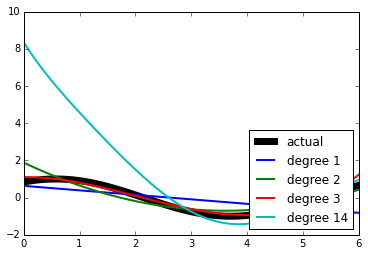

In [156]:
# linear regression - non linear transformation using sine wave
def lm_poly_fit(x, y, degree):
    # compute the transform from x-space to Z-space
    X = np.ones_like(x)
    for ix_power in range(1,degree+1):
        X = np.hstack([X, np.power(x,ix_power)])
    # perform the deed of lin regression
    w = (X.transpose()*X)**-1 * X.transpose() * y
    return w

def show_poly_fit(w, color='r',in_pts=100):
    # compute the transform from x-space to Z-space
    x = np.matrix(np.linspace(x_min, x_max, in_pts)).reshape(in_pts, 1)
    degree = w.shape[0]-1
    x_aug = np.ones_like(x)
    for ix_degree in range(1,degree+1):
        x_aug = np.hstack([x_aug, np.power(x, ix_degree)])
    # find the hypothesis val
    y = x_aug * w
    plt.plot(x, y, c=color,linewidth=2,label='degree '+str(degree))
    

# show original
x_sin = np.matrix(np.linspace(x_min,x_max,100)).reshape(100,1)
plt.plot(x_sin, np.matrix([math.sin(1+xx) for xx in x_sin]).reshape(x_sin.shape), 'k',label='actual',linewidth=7)
#plt.scatter(data[:,0],data[:,1],c='b',marker='o',s=40,label='input')

# fit various degree polynomials
show_poly_fit(lm_poly_fit(data[:,0], data[:,1], 1),'r',100)
show_poly_fit(lm_poly_fit(data[:,0], data[:,1], 2),'c',100)
show_poly_fit(lm_poly_fit(data[:,0], data[:,1], 3),'m',100)
show_poly_fit(lm_poly_fit(data[:,0], data[:,1], 14),'m',100)

plt.legend(loc='lower right')
plt.show()

In [157]:
a = np.matrix((1,2))
b = np.matrix((3,4))
print(np.divide(a,b))
s = np.linspace(-5,5,10)
print(s.shape[0])


[[ 0.33333333  0.5       ]]
10


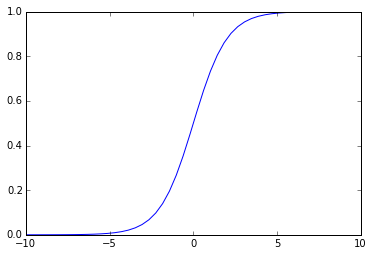

<function __main__.show_logistic>

In [158]:
# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# lets see what the logistic function does
# lower alpha makes it linear, while higher alpha makes it impulse
s = np.linspace(-5,5,100).reshape(100,1)
def show_logistic(alpha):
    x = np.linspace(-10,10)
    logistic_numerator = np.power([math.e]*x.shape[0], alpha*x)
    # logistic(x) = \frac{e^{\alpha*x}}{1 + e^{\alpha*x}}
    plt.plot(x, np.divide(logistic_numerator, logistic_numerator+1))
    plt.show()

# how logistic function behaves
interact(show_logistic, alpha=(0,2,0.01))

In [159]:
##### logistic regression
## problems faced.
## 1. forgot to divide by N and it resulted in OverflowError while computing grad_at_point(in e^(..))
## 2. forgot to add the minus sign
## 3. the learning rate, eta, was high sometimes => OverflowError
## 4. still sometimes, there is overflow error

def gradient_at_point(x, y, w):
    try:
        denominator = math.exp(y * lm_inner(w, x))
        return y*x / (1 + denominator)
    except OverflowError:
        inner_prod1 = lm_inner(w, x)
        print('<w,x>: {0}, x: {1}'.format(inner_prod1, x.transpose()))
        raise OverflowError

def lm_log_regression(x, y, degree, eta = 1e-5, T=20, epsilon=5e-4):
    # compute the transform from x-space to Z-space
    X = np.ones_like(x)
    for ix_power in range(1,degree+1):
        X = np.hstack([X, np.power(x,ix_power)])
    N, d = x.shape[0], degree+1

    # init the weights 
    w = np.random.normal(scale=3,size=(d,1))
    print('initial w: {0}'.format(w.transpose()))
    
    for t in range(T):
        # compute the fucking gradient
        gradients = np.zeros_like(w)
        # g_t = (-1/N) * \sum{n=1}{N} gradient_at_point
        for ix_data in range(N):
            gradients += -gradient_at_point(X[ix_data, :].transpose(), y[ix_data,0], w)
    
        # set the diretion to move
        v_t = -gradients/N
        
        # update the weights
        old_w = w
        new_w = w + eta*v_t
        
        # check for termination
        # can use l2 distance or sth else, like change in error(costly)
        change_w = np.sum(abs(old_w-new_w))
        print('t: {0} change_w: {1} w: {2}'.format(t, change_w, w.transpose()))
        if ( change_w < epsilon):
            break
        w = new_w
    return w

w = lm_log_regression(data[:,0], data[:, 1], 3)
print('\n\nfinal w: {0}'.format(w.transpose()))


initial w: [[ 7.50455285  0.22248309 -1.71917456  1.76303381]]
t: 0 change_w: 0.00027806002936459073 w: [[ 7.50455285  0.22248309 -1.71917456  1.76303381]]


final w: [[ 7.50455285  0.22248309 -1.71917456  1.76303381]]


In [160]:
y[2,0]

0.87253610701539075

In [161]:
from __future__ import print_function
from jupyter_core.paths import jupyter_data_dir, jupyter_path
print(jupyter_data_dir())
print(jupyter_path())

from __future__ import print_function
from jupyter_core.paths import jupyter_config_dir, jupyter_config_path
print(jupyter_config_dir())
print(jupyter_config_path())

from jupyter_core.paths import jupyter_config_dir, jupyter_data_dir
import os.path
import sys

sys.path.append(os.path.join(jupyter_data_dir(), 'extensions'))

# c = get_config()

/Users/dragon/Library/Jupyter
['/Users/dragon/Library/Jupyter', '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/share/jupyter', '/usr/local/share/jupyter', '/usr/share/jupyter']
/Users/dragon/.jupyter
['/Users/dragon/.jupyter', '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/etc/jupyter', '/usr/local/etc/jupyter', '/etc/jupyter']


In [162]:
a = np.matrix(((3,0),(0,3)))
print(a**-1)

[[ 0.33333333  0.        ]
 [ 0.          0.33333333]]


In [163]:
import numpy_display
print(centroid)


[[ 0.68342176]
 [ 0.06969236]]


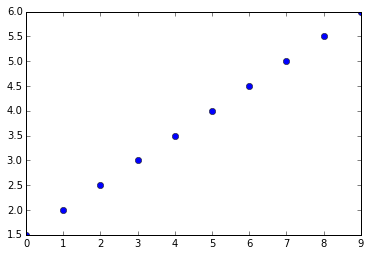

In [164]:
a, b = np.matrix((1, -2)), 3.0
x = range(10)
# <a,pt> = b
# => a_0*x + a_1*y = b
# => y = (b - a_0*x) / a_1
y = (-b - x * a[0, 0])*1.0 / a[0, 1]
plt.plot(x, y, 'o')
plt.show()